# 30 Days of Machine Learning

### This notebook is an exploratory data analysis of the Kaggle 30 Days of Machine Learning competition.

Much of this notebook were taken directly from Daniel Bourke's tutorial: https://www.youtube.com/watch?v=f1y9wDDxWnA

### Step 1: Download the data

The data was downloaded from: https://www.kaggle.com/c/30-days-of-ml/data

### Step 2: Work through the notebook

In [1]:
# Import Dependencies
%matplotlib inline

# Python Imports Follow
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Side-by-side printing
from side_by_side import print_side_by_side

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load in the Data

In [2]:
# Import train & test data into dataframe
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
# View the training data
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,499996,A,B,A,C,B,B,A,E,E,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,499997,B,B,A,C,B,C,A,E,G,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,499998,A,B,A,C,B,B,A,E,E,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [4]:
# View the testing data
test

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,B,A,A,C,B,D,A,E,E,...,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
199996,499990,B,A,A,C,B,B,A,E,C,...,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
199997,499991,A,B,B,C,B,B,A,E,C,...,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416
199998,499994,A,A,A,C,B,D,A,D,A,...,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473


In [5]:
# View the sample submission
sample_submission

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5
...,...,...
199995,499987,0.5
199996,499990,0.5
199997,499991,0.5
199998,499994,0.5


In [6]:
# We can see there are no missing values in the train data with the count
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [7]:
# There's no missing values in the test data either
test.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249970.884580,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
max,499995.000000,1.058434,0.887253,1.034687,1.039558,1.055423,1.067641,1.111540,1.032823,1.040208,0.982928,1.055955,1.071445,0.975032,0.906013


We now know there are no missing values and will not have to explore NaN values.

#### What datatypes are in the dataframe?

In [8]:
# Different data types in the dataset
train.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
target    float64
dtype: object

### Target Feature: target

Description: synthetic number representing amount of insurance claim from a real dataset.

Minimum Value: 0.140329

Maximum Value: 10.411992

This is the variable we need to predict with our machine learning models.

### Let's plot the cont feature distributions

We will see what kind of spread there is across the dataset.

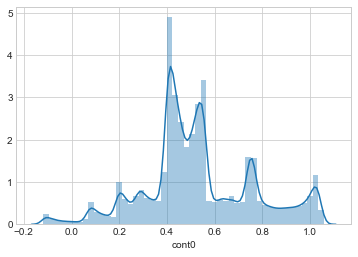

In [9]:
# Cont0
sns.distplot(train.cont0)

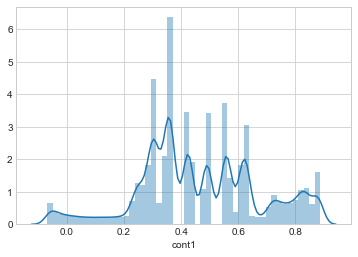

In [10]:
# Cont1
sns.distplot(train.cont1)

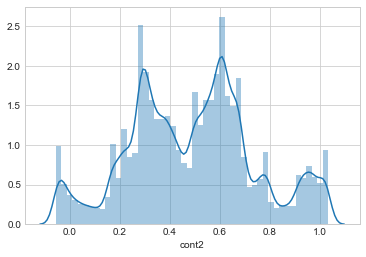

In [11]:
# Cont2
sns.distplot(train.cont2)

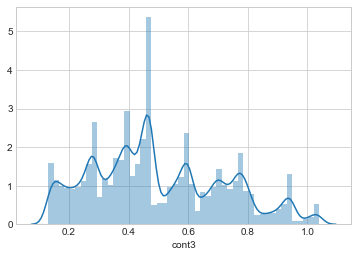

In [12]:
# Cont3
sns.distplot(train.cont3)

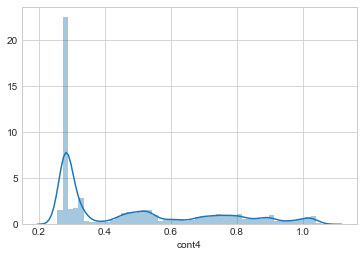

In [13]:
# Cont4
sns.distplot(train.cont4)

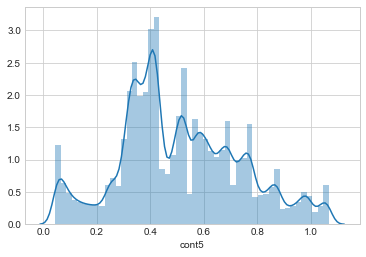

In [14]:
# Cont5
sns.distplot(train.cont5)

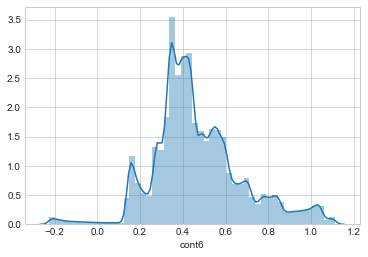

In [15]:
# Cont6
sns.distplot(train.cont6)

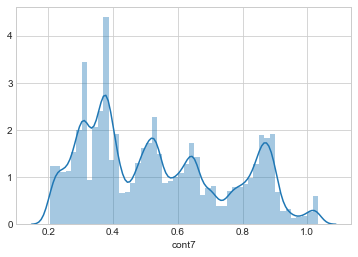

In [16]:
# Cont7
sns.distplot(train.cont7)

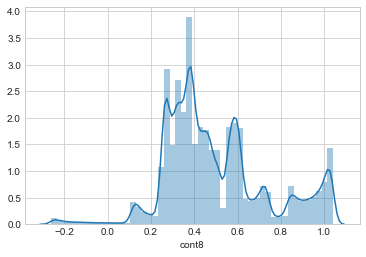

In [17]:
# Cont8
sns.distplot(train.cont8)

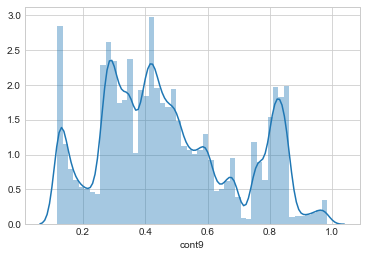

In [18]:
# Cont9
sns.distplot(train.cont9)

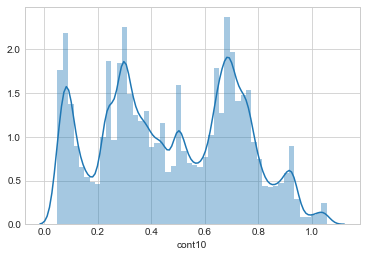

In [19]:
# Cont10
sns.distplot(train.cont10)

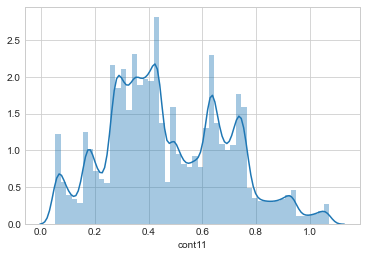

In [20]:
# Cont11
sns.distplot(train.cont11)

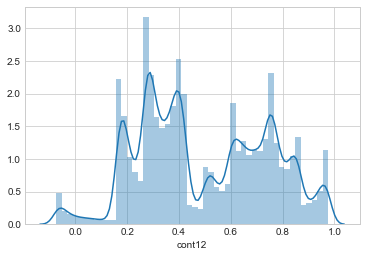

In [21]:
# Cont12
sns.distplot(train.cont12)

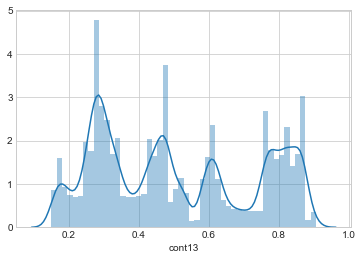

In [22]:
# Cont13
sns.distplot(train.cont13)

### Let's look how many different categories there are in the cat variables.

A    193130
B    106870
Name: cat0, dtype: int64


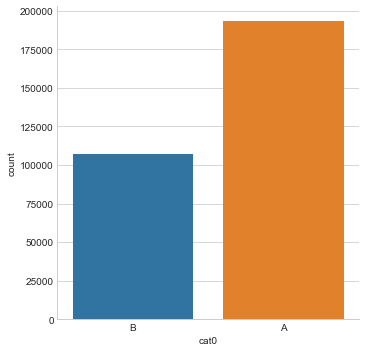

In [23]:
# Cat0
print(train.cat0.value_counts())
sns.catplot(x="cat0", kind="count", data=train)

A    154824
B    145176
Name: cat1, dtype: int64


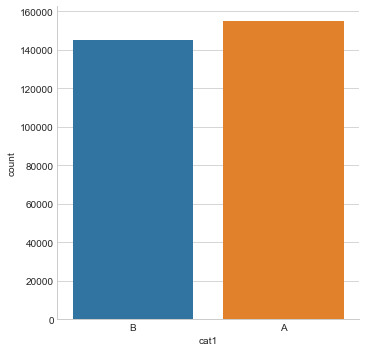

In [24]:
# Cat1
print(train.cat1.value_counts())
sns.catplot(x="cat1", kind="count", data=train)

A    253886
B     46114
Name: cat2, dtype: int64


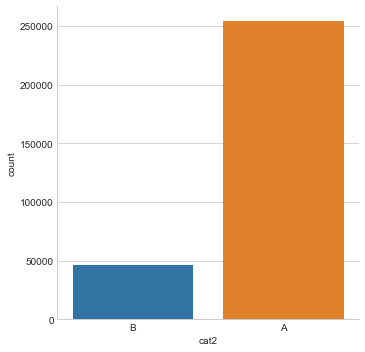

In [25]:
# Cat2
print(train.cat2.value_counts())
sns.catplot(x="cat2", kind="count", data=train)

C    263356
A     31726
D      4328
B       590
Name: cat3, dtype: int64


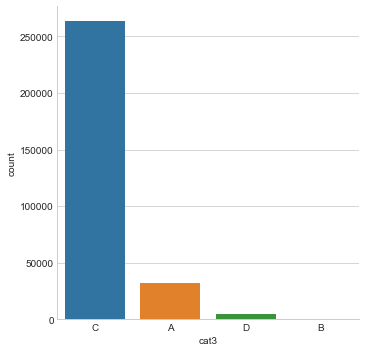

In [26]:
# Cat3
print(train.cat3.value_counts())
sns.catplot(x="cat3", kind="count", data=train)

B    294737
A      2978
C      1772
D       513
Name: cat4, dtype: int64


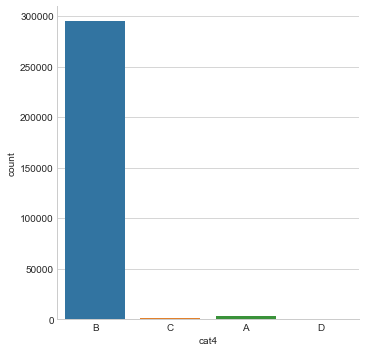

In [27]:
# Cat4
print(train.cat4.value_counts())
sns.catplot(x="cat4", kind="count", data=train)

B    149340
D    126137
C     20248
A      4275
Name: cat5, dtype: int64


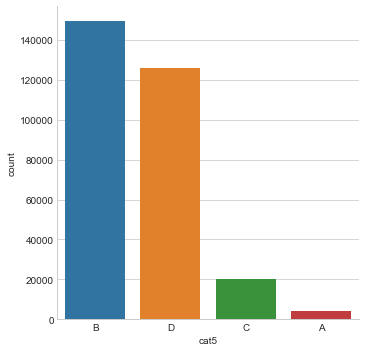

In [28]:
# Cat5
print(train.cat5.value_counts())
sns.catplot(x="cat5", kind="count", data=train)

A    290511
B      8018
C       928
D       292
I       136
H        56
E        45
G        14
Name: cat6, dtype: int64


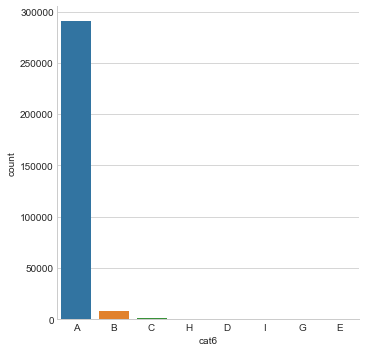

In [29]:
# Cat6
print(train.cat6.value_counts())
sns.catplot(x="cat6", kind="count", data=train)

E    276040
D     12144
B      8297
G      2870
F       562
C        36
A        31
I        20
Name: cat7, dtype: int64


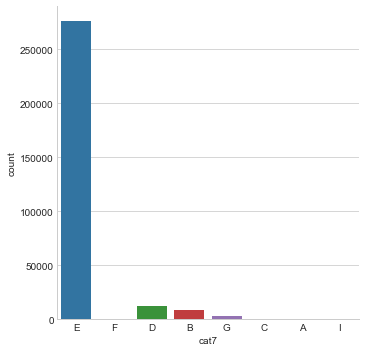

In [30]:
# Cat7
print(train.cat7.value_counts())
sns.catplot(x="cat7", kind="count", data=train)

C    111103
E     79844
A     76585
G     26128
D      5187
F       966
B       187
Name: cat8, dtype: int64


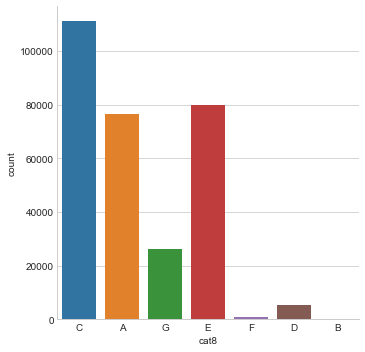

In [31]:
# Cat8
print(train.cat8.value_counts())
sns.catplot(x="cat8", kind="count", data=train)

F    71249
I    59218
G    28253
L    20958
H    19925
K    18057
N    16704
B    14477
J    14266
O    14203
A    11029
M     7931
C     1603
D     1088
E     1039
Name: cat9, dtype: int64


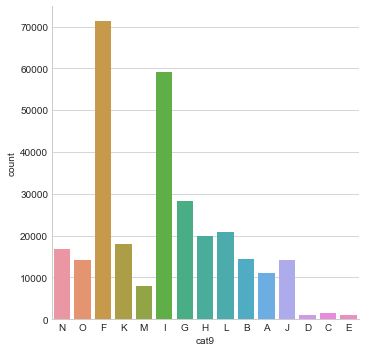

In [35]:
# Cat9
print(train.cat9.value_counts())
sns.catplot(x="cat9", kind="count", data=train)

#### Set target column as y variable and drop from the dataframe

We will also drop the 'id' column.

In [39]:
y = train.target
train_df = train.drop(['target', 'id'], axis=1)
train_df

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,B,B,A,A,B,D,A,E,A,I,...,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,A,B,A,C,B,B,A,E,E,F,...,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,B,B,A,C,B,C,A,E,G,F,...,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,A,B,A,C,B,B,A,E,E,I,...,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


#### One-hot encode the cat variables